In [1]:
import numpy as np
import pandas as pd
import os

data1 = pd.read_csv("data1.csv", encoding="gbk")
data2 = pd.read_csv("data2.csv", encoding="gbk")
data3 = pd.read_csv("data3.csv", encoding="gbk")

In [2]:
# data1数据处理
data1.head(3)

,Index,CardNo,Sex,Major,AccessCardNo
0,1,180001,男,18国际金融,19762330
1,2,180002,男,18国际金融,20521594
2,3,180003,男,18国际金融,20513946


In [3]:
data1.shape

(4341, 5)

In [4]:
# 列重命名
data1.columns = ['序号', '校园卡号', '性别', '专业名称', '门禁卡号']

In [5]:
data1.dtypes

序号       int64
校园卡号     int64
性别      object
专业名称    object
门禁卡号     int64
dtype: object

In [6]:
data1.columns

Index(['序号', '校园卡号', '性别', '专业名称', '门禁卡号'], dtype='object')

In [7]:
# 检查data1每列的缺失值的占比
data1.apply(lambda x : sum(x.isnull())/len(x), axis=0)

序号      0.0
校园卡号    0.0
性别      0.0
专业名称    0.0
门禁卡号    0.0
dtype: float64

In [8]:
# 将data1存储为task1_1_1.csv
data1.to_csv('task1_1_1.csv', index=False, encoding='gbk')

In [9]:
# data2数据处理
data2.head(3)

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,TermSerNo,conOperNo,OperNo,Dept
0,117342773,181316,20181316,2019/4/20 20:17,3.0,0.0,186.1,818,消费,49,NaN,NaN,235,第一食堂
1,117344766,181316,20181316,2019/4/20 8:47,0.5,0.0,199.5,814,消费,63,NaN,NaN,27,第二食堂
2,117346258,181316,20181316,2019/4/22 7:27,0.5,0.0,183.1,820,消费,63,NaN,NaN,27,第二食堂


In [10]:
data2.shape

(519367, 14)

In [11]:
# 列重命名
data2.columns = ['流水号', '校园卡号', '校园卡编号', '消费时间', '消费金额', '存储金额', '余额', '消费次数', '消费类型', '消费项目编码', '消费项目序列号', '消费操作编码', '操作编码', '消费地点']

In [12]:
data2.dtypes

流水号          int64
校园卡号         int64
校园卡编号        int64
消费时间        object
消费金额       float64
存储金额       float64
余额         float64
消费次数         int64
消费类型        object
消费项目编码       int64
消费项目序列号     object
消费操作编码     float64
操作编码         int64
消费地点        object
dtype: object

In [13]:
data2.columns

Index(['流水号', '校园卡号', '校园卡编号', '消费时间', '消费金额', '存储金额', '余额', '消费次数', '消费类型',
       '消费项目编码', '消费项目序列号', '消费操作编码', '操作编码', '消费地点'],
      dtype='object')

In [14]:
# 对data2中消费时间数据进行时间格式转换，coerce表示将无效解析设置为NaT
data2.loc[:,'消费时间'] = pd.to_datetime(data2.loc[:,'消费时间'],format='%Y/%m/%d %H:%M',errors='coerce')
data2.head(3)['消费时间']

0   2019-04-20 20:17:00
1   2019-04-20 08:47:00
2   2019-04-22 07:27:00
Name: 消费时间, dtype: datetime64[ns]

In [15]:
# 检查data2每列的缺失值的占比
data2.apply(lambda x : sum(x.isnull())/len(x), axis=0)

流水号        0.000000
校园卡号       0.000000
校园卡编号      0.000000
消费时间       0.000000
消费金额       0.000000
存储金额       0.000000
余额         0.000000
消费次数       0.000000
消费类型       0.000000
消费项目编码     0.000000
消费项目序列号    0.986020
消费操作编码     0.999517
操作编码       0.000000
消费地点       0.000000
dtype: float64

In [16]:
# 可发现消费项目序列号、消费操作编码的缺失值过多，所以不加入后续分析
data2_new = data2[['流水号', '校园卡号', '校园卡编号', '消费时间', '消费金额', '存储金额', '余额', '消费次数',
                '消费类型', '消费项目编码','操作编码', '消费地点']]

In [17]:
# 统计各消费地点出现的频次
data2['消费地点'].value_counts(dropna=False)

第二食堂      154873
第五食堂      117615
第一食堂       62090
第四食堂       60841
第三食堂       52103
好利来食品店     31781
财务处        18295
红太阳超市      12942
水电缴费处       3388
教师食堂        2145
医务室          794
第二图书馆        376
第一图书馆        291
工商系部         197
自然科学书库       195
财务部          170
第七教学楼        165
基础课部         133
艺术设计学院       131
第六教学楼        130
人文社科         109
第二教学楼         99
第五教学楼         99
飞凤轩宿管办        86
机电系           78
第四教学楼         56
第三教学楼         52
宿管办           47
青鸾苑宿管办        25
财经系           23
第一教学楼         23
外语系           12
旅游系            3
Name: 消费地点, dtype: int64

In [18]:
# 统计data2_new中消费金额、存储金额、余额、消费次数信息
data2_new[['消费金额','存储金额','余额','消费次数']].describe().T[['mean', '50%', 'min', 'max']]

,mean,50%,min,max
消费金额,4.087279,3.0,0.0,900.00
存储金额,3.949758,0.0,0.0,9800.00
余额,78.495517,64.5,0.0,9903.61
消费次数,1016.565421,749.0,1.0,14575.00


In [19]:
# 将data2_new存储为task1_1_2.csv
data2_new.to_csv('task1_1_2.csv', index=False, encoding='gbk')

In [20]:
# data3数据处理
data3.head(3)

,Index,AccessCardNo,Date,Address,Access,Describe
0,1330906,25558880,2019/4/1 0:00,第六教学楼[进门],1,允许通过
1,1330907,18413143,2019/4/1 0:02,第六教学楼[出门],1,允许通过
2,1331384,11642752,2019/4/1 0:00,飞凤轩[进门],1,允许通过


In [21]:
data3.shape

(43156, 6)

In [22]:
data3.columns = ['序号', '门禁卡号', '进出时间', '进出地点', '是否通过', '描述']

In [23]:
data3.dtypes

序号       int64
门禁卡号     int64
进出时间    object
进出地点    object
是否通过     int64
描述      object
dtype: object

In [24]:
data3.columns

Index(['序号', '门禁卡号', '进出时间', '进出地点', '是否通过', '描述'], dtype='object')

In [25]:
# 对data3中消费时间数据进行时间格式转换，coerce将无效解析设置为NaT
data3.loc[:,'进出时间'] = pd.to_datetime(data3.loc[:,'进出时间'],format='%Y/%m/%d %H:%M',errors='coerce')
data3.head(3)['进出时间']

0   2019-04-01 00:00:00
1   2019-04-01 00:02:00
2   2019-04-01 00:00:00
Name: 进出时间, dtype: datetime64[ns]

In [26]:
# 检查data3每列的缺失值的占比
data3.apply(lambda x : sum(x.isnull())/len(x), axis=0)

序号      0.0
门禁卡号    0.0
进出时间    0.0
进出地点    0.0
是否通过    0.0
描述      0.0
dtype: float64

In [27]:
# 各进出地点出现的频次
data3['进出地点'].value_counts(dropna=False)

飞凤轩[进门]      10689
飞凤轩[出门]      10397
第六教学楼[进门]     7713
第六教学楼[出门]     7217
青鸾苑[出门]       3318
青鸾苑[进门]       2787
第七教学楼[进门]      449
第五教学楼[进门]      250
第五教学楼[出门]      222
第七教学楼[出门]      114
Name: 进出地点, dtype: int64

In [28]:
# 单独一列的所有值出现的频次
data3['是否通过'].value_counts(dropna=False)

1    41749
0     1407
Name: 是否通过, dtype: int64

In [29]:
# 删除是否通过中值为0的数据
# 找出正常值，覆盖原表
print('删除异常值之前:',data3.shape)
data3 = data3[data3.loc[:,'是否通过'] != 0]
print('删除异常值之后：',data3.shape)

删除异常值之前: (43156, 6)
删除异常值之后： (41749, 6)


In [30]:
# 将data3存储为task1_1_3.csv
data3.to_csv('task1_1_3.csv', index=False, encoding='gbk')

In [31]:
data1 = pd.read_csv("task1_1_1.csv", encoding="gbk")
data2 = pd.read_csv("task1_1_2.csv", encoding="gbk")
data3 = pd.read_csv("task1_1_3.csv", encoding="gbk")

In [32]:
data1.head(3)

,序号,校园卡号,性别,专业名称,门禁卡号
0,1,180001,男,18国际金融,19762330
1,2,180002,男,18国际金融,20521594
2,3,180003,男,18国际金融,20513946


In [33]:
data2.head(3)

,流水号,校园卡号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,117342773,181316,20181316,2019-04-20 20:17:00,3.0,0.0,186.1,818,消费,49,235,第一食堂
1,117344766,181316,20181316,2019-04-20 08:47:00,0.5,0.0,199.5,814,消费,63,27,第二食堂
2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.1,820,消费,63,27,第二食堂


In [34]:
data3.head(3)

,序号,门禁卡号,进出时间,进出地点,是否通过,描述
0,1330906,25558880,2019-04-01 00:00:00,第六教学楼[进门],1,允许通过
1,1330907,18413143,2019-04-01 00:02:00,第六教学楼[出门],1,允许通过
2,1331384,11642752,2019-04-01 00:00:00,飞凤轩[进门],1,允许通过


In [35]:
# data1连data2
data1_merge_data2 = pd.merge(data1, data2, how='left', left_on='校园卡号', right_on='校园卡号')

In [36]:
data1_merge_data2.shape

(242152, 16)

In [37]:
data1_merge_data2.tail()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
242147,4339,184339,女,18工业工程,11513762,117193924.0,20184339.0,2019-04-15 07:27:00,0.6,0.0,45.9,527.0,消费,127.0,204.0,第五食堂
242148,4339,184339,女,18工业工程,11513762,117195245.0,20184339.0,2019-04-15 13:14:00,6.0,0.0,39.9,528.0,消费,132.0,204.0,第五食堂
242149,4339,184339,女,18工业工程,11513762,117212601.0,20184339.0,2019-04-12 15:05:00,0.5,0.0,58.3,521.0,消费,141.0,204.0,第五食堂
242150,4340,164340,男,18审计,12750370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242151,4341,164341,男,18宝玉石鉴定,427586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 检查data1_merge_data2每列的缺失值的占比
data1_merge_data2.apply(lambda x : sum(x.isnull())/len(x), axis=0)

序号        0.000000
校园卡号      0.000000
性别        0.000000
专业名称      0.000000
门禁卡号      0.000000
流水号       0.004431
校园卡编号     0.004431
消费时间      0.004431
消费金额      0.004431
存储金额      0.004431
余额        0.004431
消费次数      0.004431
消费类型      0.004431
消费项目编码    0.004431
操作编码      0.004431
消费地点      0.004431
dtype: float64

In [39]:
# 缺失值处理，所选列有空即删除该行
print('删除缺失值前：', data1_merge_data2.shape)
data1_merge_data2 = data1_merge_data2.dropna(subset=['消费地点'], how='any')
print('删除缺失值后：', data1_merge_data2.shape)

删除缺失值前： (242152, 16)
删除缺失值后： (241079, 16)


In [40]:
# 将data1_merge_data2存储为task1_2_1.csv
data1_merge_data2.to_csv('task1_2_1.csv', index=False, encoding='gbk')

In [41]:
# data1连data3
data1_merge_data3 = pd.merge(data1, data3, how='left', left_on='门禁卡号', right_on='门禁卡号')

In [42]:
data1_merge_data3.tail()

,序号_x,校园卡号,性别,专业名称,门禁卡号,序号_y,进出时间,进出地点,是否通过,描述
21704,4337,184337,女,18工业工程,19051328,NaN,NaN,NaN,NaN,NaN
21705,4338,184338,女,18工业工程,21915376,NaN,NaN,NaN,NaN,NaN
21706,4339,184339,女,18工业工程,11513762,NaN,NaN,NaN,NaN,NaN
21707,4340,164340,男,18审计,12750370,NaN,NaN,NaN,NaN,NaN
21708,4341,164341,男,18宝玉石鉴定,427586,NaN,NaN,NaN,NaN,NaN


In [43]:
#检查data1_merge_data3每列的缺失值的占比
data1_merge_data3.apply(lambda x : sum(x.isnull())/len(x), axis=0)

序号_x    0.000000
校园卡号    0.000000
性别      0.000000
专业名称    0.000000
门禁卡号    0.000000
序号_y    0.157723
进出时间    0.157723
进出地点    0.157723
是否通过    0.157723
描述      0.157723
dtype: float64

In [44]:
# 缺失值处理，所选列有空即删除该行
print('删除缺失值前：', data1_merge_data3.shape)
data1_merge_data3 = data1_merge_data3.dropna(subset=['进出地点'], how='any')
print('删除缺失值后：', data1_merge_data3.shape)

删除缺失值前： (21709, 10)
删除缺失值后： (18285, 10)


In [45]:
data1_merge_data3.tail()

,序号_x,校园卡号,性别,专业名称,门禁卡号,序号_y,进出时间,进出地点,是否通过,描述
21682,4319,184319,女,18宝玉石鉴定,13251362,1368528.0,2019-04-23 22:04:00,飞凤轩[进门],1.0,允许通过
21683,4319,184319,女,18宝玉石鉴定,13251362,1369456.0,2019-04-25 00:00:00,飞凤轩[出门],1.0,允许通过
21684,4319,184319,女,18宝玉石鉴定,13251362,1373776.0,2019-04-27 06:56:00,飞凤轩[出门],1.0,允许通过
21685,4319,184319,女,18宝玉石鉴定,13251362,1373779.0,2019-04-27 06:59:00,飞凤轩[进门],1.0,允许通过
21686,4319,184319,女,18宝玉石鉴定,13251362,1374272.0,2019-04-27 19:10:00,飞凤轩[进门],1.0,允许通过


In [46]:
# 将data1_merge_data3存储为task1_2_2.csv
data1_merge_data3.to_csv('task1_2_2.csv', index=False, encoding='gbk')

In [47]:
data = pd.read_csv('task1_2_1.csv', encoding='gbk')

In [48]:
data.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂
3,1,180001,男,18国际金融,19762330,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂
4,1,180001,男,18国际金融,19762330,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂


In [49]:

import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/System/Library/Fonts/PingFang.ttc")
import warnings
warnings.filterwarnings('ignore')

In [50]:
canteen1 = data['消费地点'].apply(str).str.contains('第一食堂').sum()
canteen2 = data['消费地点'].apply(str).str.contains('第二食堂').sum()
canteen3 = data['消费地点'].apply(str).str.contains('第三食堂').sum()
canteen4 = data['消费地点'].apply(str).str.contains('第四食堂').sum()
canteen5 = data['消费地点'].apply(str).str.contains('第五食堂').sum()

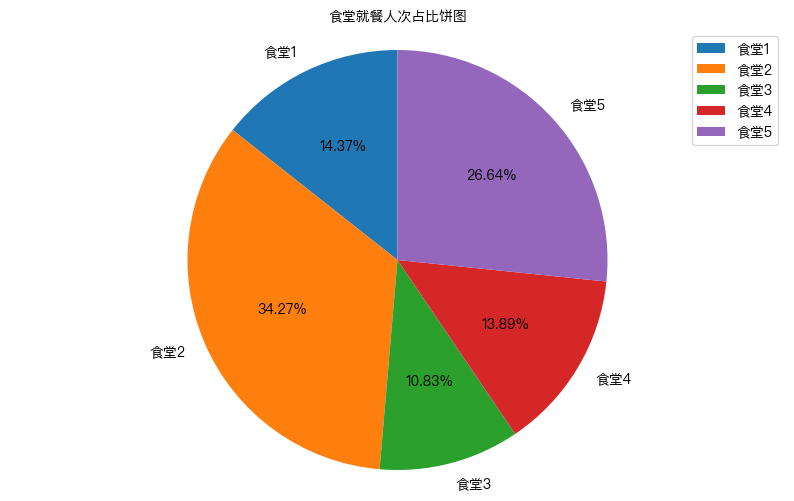

In [51]:
# 绘制饼图
canteen_name = ['食堂1', '食堂2', '食堂3', '食堂4', '食堂5']
man_count = [canteen1,canteen2,canteen3,canteen4,canteen5]
# 创建画布
plt.figure(figsize=(10, 6), dpi=50)
# 绘制饼图
plt.pie(man_count, labels=canteen_name, autopct='%1.2f%%', shadow=False, startangle=90, textprops={'fontproperties':font})
# 显示图例
plt.legend(prop=font)
# 添加标题
plt.title("食堂就餐人次占比饼图", fontproperties=font)
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [52]:
data.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂
3,1,180001,男,18国际金融,19762330,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂
4,1,180001,男,18国际金融,19762330,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂


In [53]:
data.dtypes

序号          int64
校园卡号        int64
性别         object
专业名称       object
门禁卡号        int64
流水号       float64
校园卡编号     float64
消费时间       object
消费金额      float64
存储金额      float64
余额        float64
消费次数      float64
消费类型       object
消费项目编码    float64
操作编码      float64
消费地点       object
dtype: object

In [54]:
# 对data中消费时间数据进行时间格式转换，转换后可作运算，coerce将无效解析设置为NaT
data.loc[:,'消费时间'] = pd.to_datetime(data.loc[:,'消费时间'],format='%Y-%m-%d %H:%M',errors='coerce')
data.dtypes

序号                 int64
校园卡号               int64
性别                object
专业名称              object
门禁卡号               int64
流水号              float64
校园卡编号            float64
消费时间      datetime64[ns]
消费金额             float64
存储金额             float64
余额               float64
消费次数             float64
消费类型              object
消费项目编码           float64
操作编码             float64
消费地点              object
dtype: object

In [55]:
# 创建一个消费星期列，根据消费时间计算出消费时间是星期几，Monday=1, Sunday=7
data['消费星期'] = data['消费时间'].dt.dayofweek + 1
data.head(3)

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点,消费星期
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂,7
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂,1
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂,3


In [56]:
# 以周一至周五作为工作日，周六日作为非工作日，拆分为两组数据
work_day_query = data.loc[:,'消费星期'] <= 5
unwork_day_query = data.loc[:,'消费星期'] > 5

work_day_data = data.loc[work_day_query,:]
unwork_day_data = data.loc[unwork_day_query,:]

In [57]:
# 计算工作日消费时间对应的各时间的消费总次数
work_day_times = []
for i in range(24):
    work_day_times.append(work_day_data['消费时间'].apply(str).str.contains(' {:02d}:'.format(i)).sum())

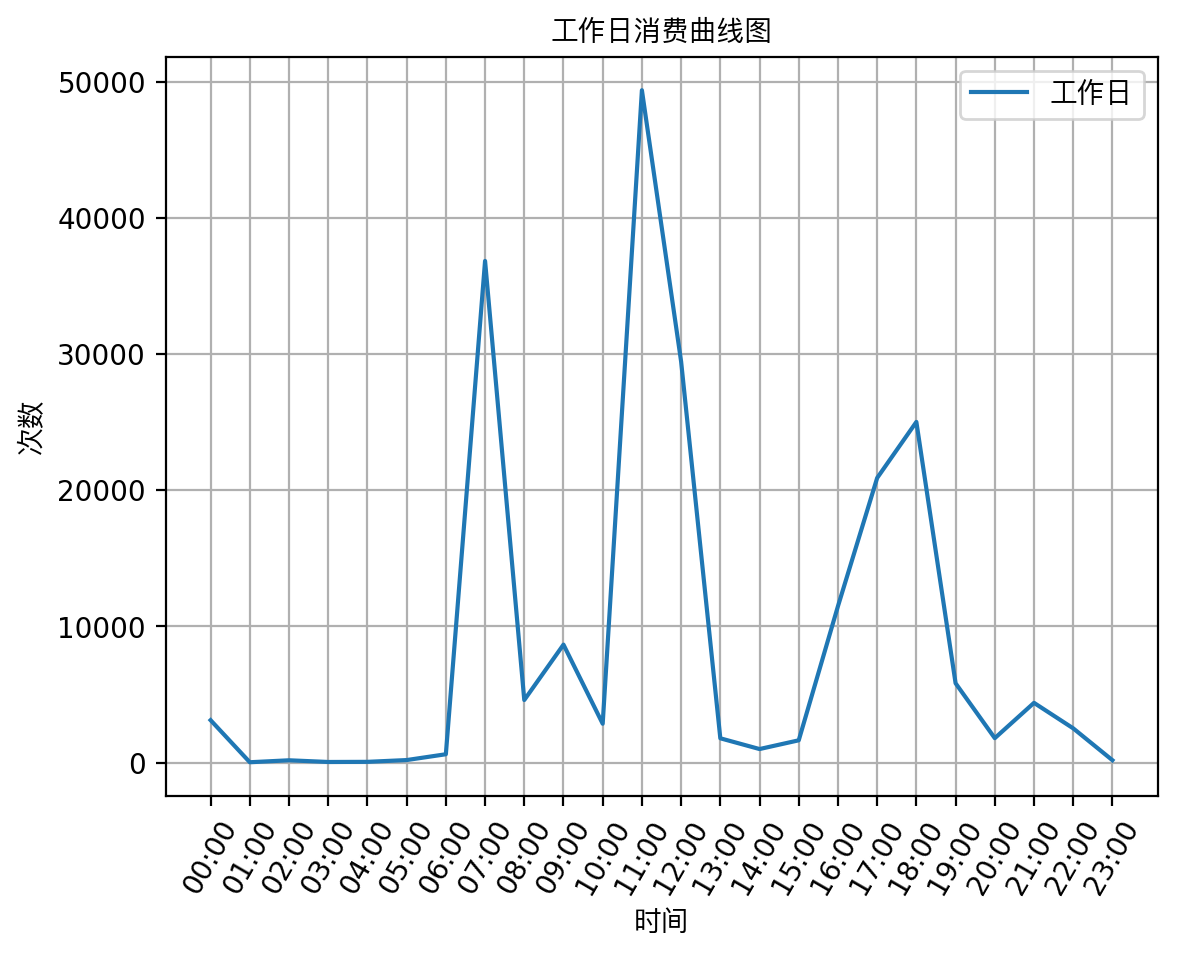

In [58]:
# 以时间段作为x轴，同一时间段出现的次数和作为y轴，作曲线图
x = []
for i in range(24):
    x.append('{:02d}:00'.format(i))
# 绘图
plt.plot(x, work_day_times, label='工作日')
# x,y轴标签
plt.xlabel('时间', fontproperties=font);
plt.ylabel('次数', fontproperties=font)
# 标题
plt.title('工作日消费曲线图', fontproperties=font)
# x轴倾斜60度
plt.xticks(rotation=60)
# 显示label
plt.legend(prop=font)
# 加网格
plt.grid()

In [59]:
# 计算非工作日消费时间对应的各时间的消费总次数
unwork_day_times = []
for i in range(24):
    unwork_day_times.append(unwork_day_data['消费时间'].apply(str).str.contains(' {:02d}:'.format(i)).sum())

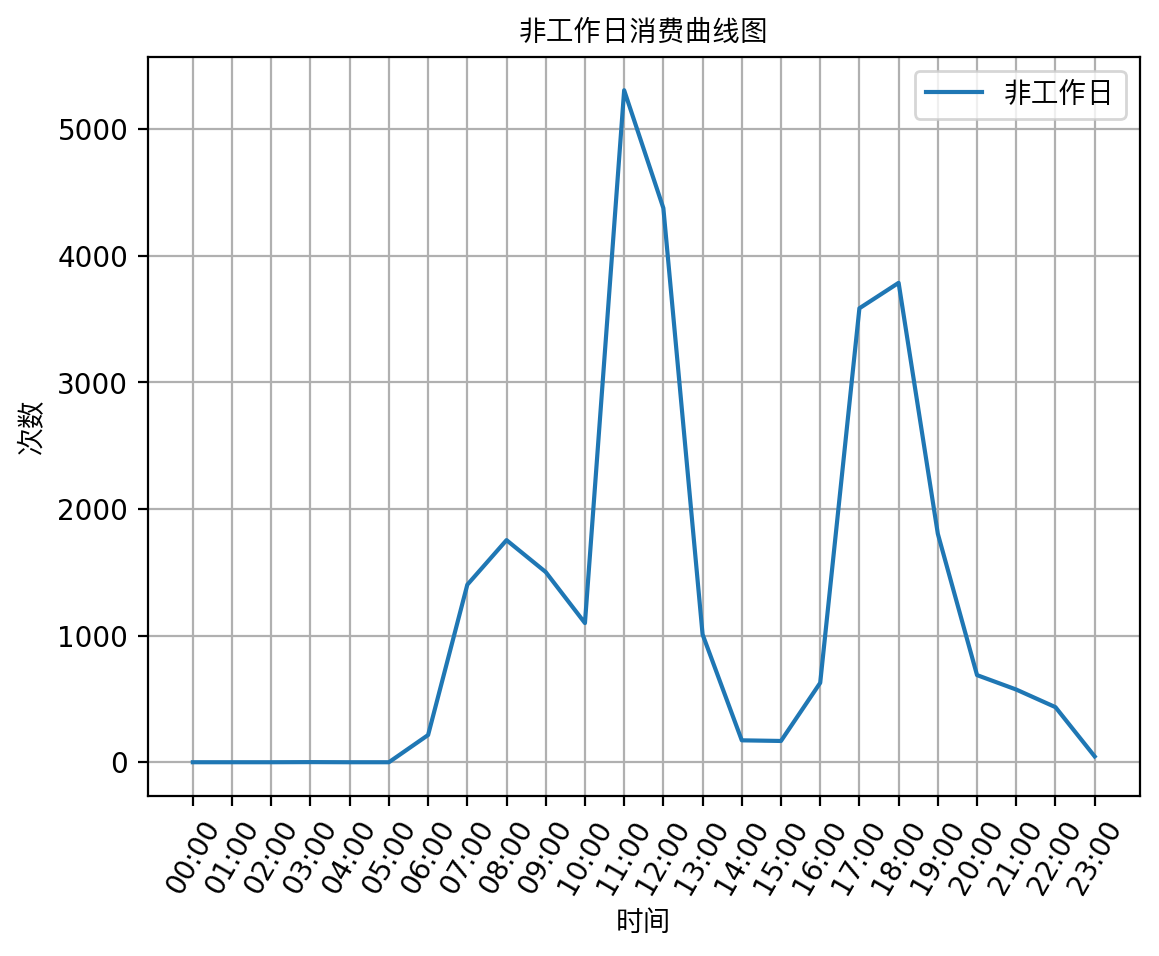

In [60]:
# 以时间段作为x轴，同一时间段出现的次数和作为y轴，作曲线图
x = []
for i in range(24): 
    x.append('{:02d}:00'.format(i))
plt.plot(x, unwork_day_times, label='非工作日')
plt.xlabel('时间', fontproperties=font);
plt.ylabel('次数', fontproperties=font)
plt.title('非工作日消费曲线图', fontproperties=font)
plt.xticks(rotation=60)
plt.legend(prop=font)
plt.grid()

In [61]:
data = pd.read_csv('task1_2_1.csv', encoding='gbk')
data.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂
3,1,180001,男,18国际金融,19762330,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂
4,1,180001,男,18国际金融,19762330,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂


In [62]:
# 计算人均刷卡频次(总刷卡次数/学生总人数)
cost_count = data['消费时间'].count()
student_count = data['校园卡号'].value_counts(dropna=False).count()
average_cost_count = int(round(cost_count / student_count))
average_cost_count

74

In [63]:
# 计算人均消费额(总消费金额/学生总人数)
cost_sum = data['消费金额'].sum()
average_cost_money = int(round(cost_sum / student_count))
average_cost_money

285

In [64]:
# 选择消费次数最多的3个专业进行分析
data['专业名称'].value_counts(dropna=False)

18连锁经营        12100
18机械制造        11181
18会计          10055
18宝玉石鉴定        8602
18金融管理         8494
18国际商务         8339
18模具设计         8331
18国贸实务         8201
18软件技术         8166
18商务英语         7452
18工程造价         7131
18旅游管理         6873
18皮具艺术         6792
18电子商务         6754
18审计           6564
18工业机器人        6463
18工业设计         6300
18建筑工程         6279
18电气自动化        6171
18建筑设计         6140
18计算机网络        6110
18工商企管         5763
18投资与理财        5544
18社会工作         5510
18汽车检测         5093
18市场营销         5092
18计算机应用        4546
18国际金融         4351
18艺术设计         4278
18嵌入式技术        4196
18商务日语         4154
18工业工程         3987
18酒店管理         3895
18物流管理         3666
18动漫设计         3520
18首饰设计         3411
18视觉传播         2941
18环境艺术         2853
18产品艺术         2550
18市政工程         1840
18机械制造（学徒）     1391
Name: 专业名称, dtype: int64

In [65]:
# 消费次数最多的3个专业为 连锁经营、机械制造、会计
major1 = data['专业名称'].apply(str).str.contains('18连锁经营')
major2 = data['专业名称'].apply(str).str.contains('18机械制造')
major3 = data['专业名称'].apply(str).str.contains('18会计')
major4 = data['专业名称'].apply(str).str.contains('18机械制造（学徒）')

data_new = data[(major1 | major2 | major3) ^ major4]
data_new['专业名称'].value_counts(dropna=False)

18连锁经营    12100
18机械制造    11181
18会计      10055
Name: 专业名称, dtype: int64

In [66]:
# 分析 每个专业，不同性别 的学生消费特点
data_male = data_new[data_new['性别'] == '男']
data_female = data_new[data_new['性别'] == '女']
data_female.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
4134,81,180081,女,18会计,18929482,117308277.0,201881.0,2019-04-21 14:03:00,2.0,0.0,23.3,616.0,消费,196.0,133.0,好利来食品店
4135,81,180081,女,18会计,18929482,117308744.0,201881.0,2019-04-22 09:32:00,2.0,0.0,17.9,619.0,消费,196.0,133.0,好利来食品店
4136,81,180081,女,18会计,18929482,117320320.0,201881.0,2019-04-21 16:41:00,3.0,0.0,19.9,618.0,消费,111.0,204.0,第五食堂
4137,81,180081,女,18会计,18929482,117327241.0,201881.0,2019-04-21 16:40:00,0.4,0.0,22.9,617.0,消费,134.0,204.0,第五食堂
4138,81,180081,女,18会计,18929482,117330384.0,201881.0,2019-04-21 09:45:00,2.6,0.0,30.9,614.0,消费,114.0,8.0,第五食堂


In [67]:
data['专业名称'].value_counts(dropna=False).count()

41

In [68]:
# 选择特征：性别、总消费金额、总消费次数
data_1 = data[['校园卡号','性别']].drop_duplicates().reset_index(drop=True)
data_1['性别'] = data_1['性别'].astype(str).replace(({'男': 1, '女': 0}))
data_1.set_index(['校园卡号'], inplace=True)
data_2 = data.groupby('校园卡号').sum()[['消费金额']]
data_2.columns = ['总消费金额']
data_3 = data.groupby('校园卡号').count()[['消费时间']]
data_3.columns = ['总消费次数']
data_123 =  pd.concat([data_1, data_2, data_3], axis=1)#.reset_index(drop=True)
data_123.head()

,性别,总消费金额,总消费次数
校园卡号,,,
180001,1,161.6,35
180002,1,126.8,47
180004,1,572.0,100
180005,1,185.1,36
180006,1,85.7,23


In [69]:
# 构建聚类模型
from sklearn.cluster import KMeans
# k为聚类类别，iteration为聚类最大循环次数，data_zs为标准化后的数据
k = 3    # 分成几类可以在此处调整
iteration = 500
data_zs = 1.0 * (data_123 - data_123.mean()) / data_123.std()
# n_jobs为并发数
model = KMeans(n_clusters=k,  max_iter=iteration, random_state=1234)
model.fit(data_zs)
# r1统计各个类别的数目，r2找出聚类中心
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2,r1], axis=1)
r.columns = list(data_123.columns) + ['类别数目']
r.head()

,性别,总消费金额,总消费次数,类别数目
0,-0.821482,0.258289,0.442369,1378
1,1.214499,0.809473,0.604223,835
2,0.114410,-0.981565,-1.060302,1055


In [70]:
r = pd.concat([data_123, pd.Series(model.labels_, index=data_123.index)], axis=1)
r.columns = list(data_123.columns) + ['聚类类别']
r.head()

,性别,总消费金额,总消费次数,聚类类别
校园卡号,,,,
180001,1,161.6,35,2
180002,1,126.8,47,2
180004,1,572.0,100,1
180005,1,185.1,36,2
180006,1,85.7,23,2


In [71]:
# 选出消费总额最低的500名学生的消费信息
data_500 = data.groupby('校园卡号').sum()[['消费金额']]
data_500.sort_values(by=['消费金额'],ascending=True,inplace=True,na_position='first')
data_500 = data_500.head(500)
data_500_index = data_500.index.values
data_500 = data[data['校园卡号'].isin(data_500_index)]
data_500.head(10)

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
35,2,180002,男,18国际金融,20521594,117309755.0,20182.0,2019-04-22 12:01:00,0.0,100.0,103.5,261.0,存款,202.0,143.0,财务处
36,2,180002,男,18国际金融,20521594,117394486.0,20182.0,2019-04-23 07:55:00,2.0,0.0,101.5,262.0,消费,105.0,236.0,第一食堂
37,2,180002,男,18国际金融,20521594,117394487.0,20182.0,2019-04-23 07:56:00,2.0,0.0,99.5,263.0,消费,105.0,236.0,第一食堂
38,2,180002,男,18国际金融,20521594,117394560.0,20182.0,2019-04-24 07:51:00,2.0,0.0,97.5,264.0,消费,105.0,236.0,第一食堂
39,2,180002,男,18国际金融,20521594,116929095.0,20182.0,2019-04-05 16:42:00,10.0,0.0,80.5,231.0,消费,107.0,135.0,红太阳超市
40,2,180002,男,18国际金融,20521594,116936140.0,20182.0,2019-04-01 17:48:00,3.5,0.0,104.7,223.0,消费,8.0,27.0,第二食堂
41,2,180002,男,18国际金融,20521594,116939618.0,20182.0,2019-04-01 17:49:00,2.0,0.0,102.7,224.0,消费,31.0,27.0,第二食堂
42,2,180002,男,18国际金融,20521594,116944533.0,20182.0,2019-04-01 17:47:00,0.6,0.0,108.2,222.0,消费,63.0,27.0,第二食堂
43,2,180002,男,18国际金融,20521594,116969182.0,20182.0,2019-04-07 12:59:00,2.5,0.0,64.2,241.0,消费,2.0,235.0,第一食堂
44,2,180002,男,18国际金融,20521594,116973263.0,20182.0,2019-04-05 11:50:00,3.5,0.0,98.0,227.0,消费,19.0,235.0,第一食堂


In [72]:
# 取出最低消费500人的最频繁的消费地点，并添加一列 最常消费地点
data['最常消费地点'] = data.groupby('校园卡号')['消费地点'].transform(lambda x: x.value_counts().index[0])
data.head(10)

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点,最常消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂,第四食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂,第四食堂
3,1,180001,男,18国际金融,19762330,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂,第四食堂
4,1,180001,男,18国际金融,19762330,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂,第四食堂
5,1,180001,男,18国际金融,19762330,117367323.0,20181.0,2019-04-23 09:52:00,2.0,0.0,15.9,209.0,消费,87.0,27.0,第二食堂,第四食堂
6,1,180001,男,18国际金融,19762330,117378955.0,20181.0,2019-04-23 11:53:00,7.0,0.0,8.9,210.0,消费,62.0,2.0,第四食堂,第四食堂
7,1,180001,男,18国际金融,19762330,117380758.0,20181.0,2019-04-22 17:42:00,7.0,0.0,17.9,208.0,消费,72.0,250.0,第四食堂,第四食堂
8,1,180001,男,18国际金融,19762330,117222956.0,20181.0,2019-04-16 07:44:00,1.6,0.0,32.6,195.0,消费,8.0,27.0,第二食堂,第四食堂
9,1,180001,男,18国际金融,19762330,117225959.0,20181.0,2019-04-17 00:00:00,3.6,0.0,13.0,199.0,消费,32.0,27.0,第二食堂,第四食堂


In [73]:
data_max_place = data['最常消费地点'].value_counts(dropna=False)
data_max_place

第二食堂      99688
第五食堂      77920
第三食堂      22185
第四食堂      18747
第一食堂      17712
好利来食品店     4353
红太阳超市       377
教师食堂         35
财务部          28
财务处          11
水电缴费处        10
第四教学楼         4
第二图书馆         3
第七教学楼         2
第五教学楼         2
医务室           1
第一图书馆         1
Name: 最常消费地点, dtype: int64

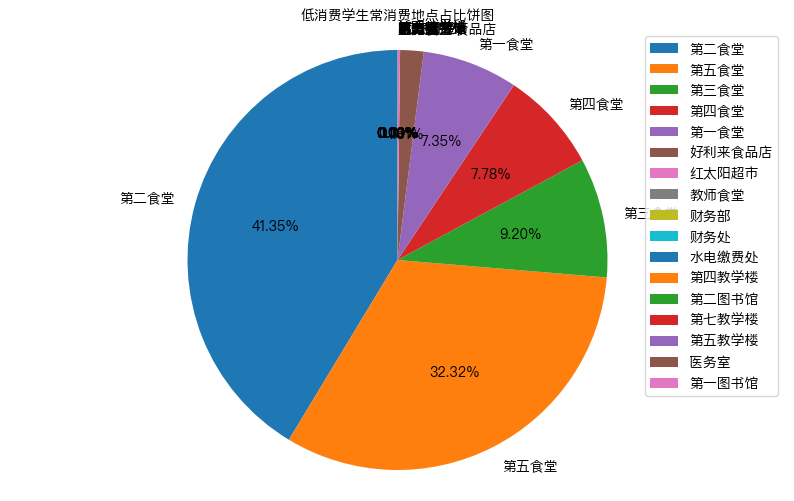

In [74]:
# 绘制饼图
canteen_name = list(data_max_place.index)
man_count = list(data_max_place.values)
# 创建画布
plt.figure(figsize=(10, 6), dpi=50)
# 绘制饼图
plt.pie(man_count, labels=canteen_name, autopct='%1.2f%%', shadow=False, startangle=90, textprops={'fontproperties':font})
# 显示图例
plt.legend(prop=font)
# 添加标题
plt.title("低消费学生常消费地点占比饼图", fontproperties=font)
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()